<a href="https://colab.research.google.com/github/ponomarevaJV/PDA_SOL/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%965%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv ('/content/drive/MyDrive/Python /ДЗ 5/marketing_campaign.csv')
df1 = pd.read_csv ('/content/drive/MyDrive/Python /ДЗ 5/subscribers.csv')
df2 = pd.read_csv ('/content/drive/MyDrive/Python /ДЗ 5/users.csv')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
st = len(df)
st1 = len(df1)
st2 = len(df2)
print(st,st1,st2)

10037 10037 10037


In [5]:
df3 = df1.drop(['user_id'], axis=1)

In [6]:
df4 = df2.drop(['user_id'], axis=1)

In [7]:
result = pd.concat([df, df3,df4], axis=1, join='inner')
display(result)

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   language_displayed   10037 non-null  object
 5   converted            10022 non-null  object
 6   subscribing_channel  1856 non-null   object
 7   date_subscribed      1856 non-null   object
 8   date_canceled        577 non-null    object
 9   is_retained          1856 non-null   object
 10  age_group            10037 non-null  object
 11  language_preferred   10037 non-null  object
dtypes: object(12)
memory usage: 941.1+ KB


In [9]:
result.describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
count,10037,10021,10022,10037,10037,10022,1856,1856,577,1856,10037,10037
unique,10037,31,5,2,4,2,5,31,115,2,7,4
top,a1000,1/15/18,House Ads,control,English,False,Instagram,1/16/18,4/2/18,True,19-24 years,English
freq,1,789,4733,5091,9793,8946,600,163,15,1279,1682,9275


In [10]:
print(df['marketing_channel'].value_counts())

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64


In [11]:
dn = df.groupby('marketing_channel')['converted'].sum()
print(dn)

marketing_channel
Email        193
Facebook     237
House Ads    298
Instagram    265
Push          83
Name: converted, dtype: object


In [12]:
new_df = pd.DataFrame({
    'marketing_channel': dn.index,
    'converted_sum': dn
})

In [13]:
new_df

,marketing_channel,converted_sum
marketing_channel,,
Email,Email,193
Facebook,Facebook,237
House Ads,House Ads,298
Instagram,Instagram,265
Push,Push,83


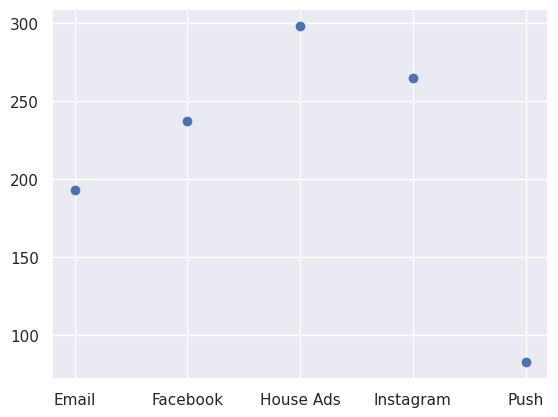

In [14]:
x = new_df['marketing_channel']
y = new_df['converted_sum']

plt.scatter(x, y)
plt.show()

По графику видно, что самым эффективным каналом явялется House Ads, а самым не эффективным Push

In [15]:
result

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


In [16]:
result = pd.concat([df, df3,df4], axis=1, join='inner')
display(result)

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


In [17]:
age_group = 'age_group'

unique_values = result[age_group].unique()
print(unique_values)

['0-18 years' '19-24 years' '24-30 years' '30-36 years' '36-45 years'
 '45-55 years' '55+ years']


In [18]:
age_group = result['age_group'].value_counts()
age_group

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [19]:
result['date_subscribed'] = pd.to_datetime(result['date_subscribed'])

first_subscription_date = result['date_subscribed'].min()
first_subscription_date

Timestamp('2018-01-01 00:00:00')

In [53]:
gr = result[result['is_retained'] == 'True'].groupby(['age_group', 'language_preferred']).size()


Задание №2

In [20]:
def value(x):
    return - 45*x[0] - 80*x[1]

In [21]:
neq_cons = {'type': 'ineq', 'fun': lambda x: np.array([400 - 5 * x[0] - 20 * x[1],
                                                          450 - 10 * x[0] - 15 * x[1]])}

In [22]:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [23]:
from scipy.optimize import minimize
x0 = np.array([45, 45])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print("Количество стульев:", round(res.x[0]))
print("Количество столов:", round(res.x[1]))

Количество стульев: 24
Количество столов: 14


In [24]:
print('Максимальная прибыль :', -1*value([24, 14]),'дол.')

Максимальная прибыль : 2200 дол.


Задание 3

In [25]:
df5 = pd.DataFrame({'day': [1, 3, 7, 14, 21, 30],
                   'cumulative_ARPU': [0.4, 0.6, 0.8, 1.10, 1.30, 1.40]})
df5.head(6)

,day,cumulative_ARPU
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


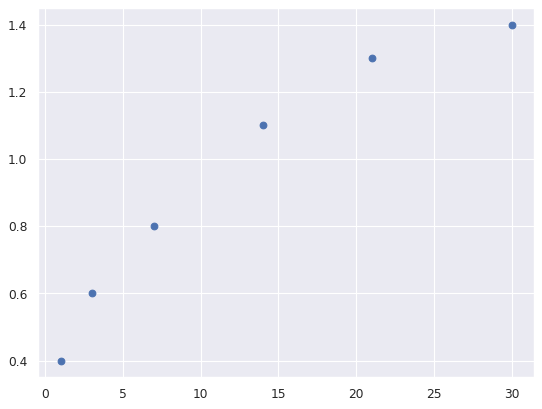

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df5['day'], df5['cumulative_ARPU'], label="Original Data" )

In [27]:
import matplotlib.pyplot as plt

In [28]:
def ln_func(x, a, b):
    return a * np.log10(x) + b

In [29]:
def exp_func( x, a, b):
    return a * (b ** x)

In [30]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(ln_func, df5['day'], df5['cumulative_ARPU'])

In [31]:
exp_popt, exp_pcov = curve_fit(exp_func, df5['day'], df5['cumulative_ARPU'])

In [32]:
dl = 90

In [33]:
dy = ln_func(np.arange( dl ), *log_popt)
ey = exp_func(np.arange( dl), *exp_popt)

<ipython-input-28-f3aac84ebc06>:2: RuntimeWarning: divide by zero encountered in log10
  return a * np.log10(x) + b


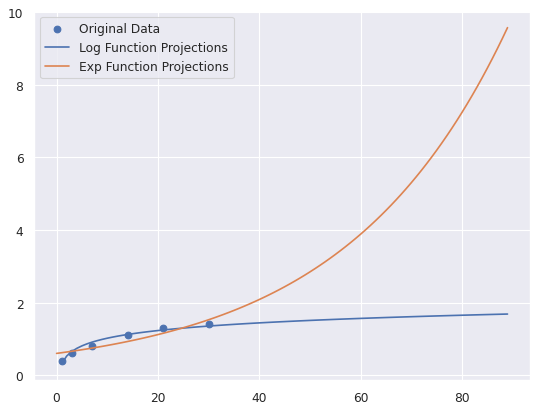

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df5['day'], df5['cumulative_ARPU'], label="Original Data" )
plt.plot( dy, label="Log Function Projections" )
plt.plot( ey, label="Exp Function Projections" )
plt.legend()
plt.show()

In [35]:
print('Прогноз - сколько в среднем принесет денег пользователь на 90й день по log модели', round(dy[89],1))
print('Прогноз - сколько в среднем принесет денег пользователь на 90й день по exp модели', round(ey[89],1))

Прогноз - сколько в среднем принесет денег пользователь на 90й день по log модели 1.7
Прогноз - сколько в среднем принесет денег пользователь на 90й день по exp модели 9.6


In [36]:
log_dy = [dy[ i ] for i in list(df5['day'])]
log_dy

[0.3182915349828918,
 0.6525362979654962,
 0.9103204821057709,
 1.1212054480469356,
 1.2445652450883753,
 1.353080991114816]

In [37]:
y_exp_pred = [ey[ i ] for i in list(df5['day'])]
y_exp_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

In [38]:
actual_values = np.array([0.4, 0.6, 0.8, 1.10, 1.30, 1.40])
predicted_values = np.array([0.3182915349828918, 0.6525362979654962, 0.9103204821057709, 1.1212054480469356, 1.2445652450883753, 1.353080991114816])

In [39]:
mse = np.mean((actual_values - predicted_values) ** 2)
mse

0.004555170184195374

In [40]:
ay = np.array([0.4, 0.6, 0.8, 1.10, 1.30, 1.40])
pv = np.array([0.6193285013669545, 0.659088716032839, 0.7464307044090908, 0.9280456295448732, 1.153849493904676, 1.5266933282102846])

In [41]:
mse = np.mean((actual_values - predicted_values) ** 2)
mse

0.004555170184195374

Вывод: логарифмическая функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой (0.004555170184195374), поэтому целесообразнее использовать для прогноза только данную функцию